# Project: Image-based steganography
This project entails the development of a steganographic software module designed to embed secret messages within digital images through the subtle alteration of the least significant bits (LSB) of the RGB color channels of image pixels. By leveraging this LSB steganography technique, the system ensures the covert transmission of information with negligible impact on the image's visual fidelity. The software features advanced algorithms for both the encoding and decoding processes, enabling users to securely embed and extract textual data within images without inducing perceptible visual distortions, thereby maintaining the integrity of the original digital media.
<div style="text-align: right">
Karolina Buchnat<br>
Aleksander Malcew
</div>

## Encoder

**Message to be encrypted:**

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.



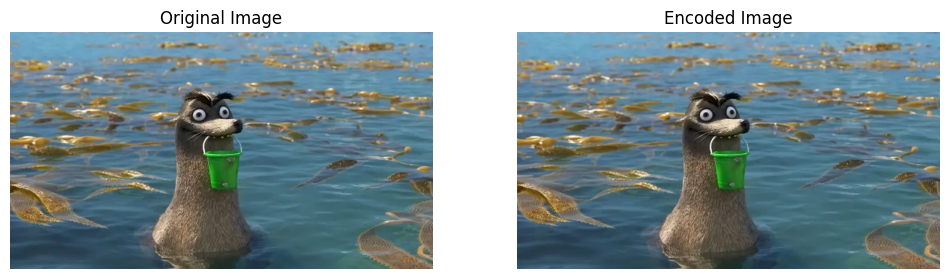

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

bin_format = f'08b'
STX = format(2, bin_format)
ETX = format(3, bin_format)

def secret_to_binary(plain):
    """
    Convert a plain text message into its binary representation.
    
    This function takes a plain text string and converts each character
    into its binary equivalent using Python's format function, appending
    a specified end-of-text (ETX) marker at the end of the sequence. The
    binary representation of each character is determined by its ASCII
    value.
    
    Parameters:
    - plain (str): The plain text message to convert.
    
    Returns:
    - list: A list of strings, where each string represents the binary
      representation of a character from the input message. The list
      concludes with an ETX marker to indicate the end of the message.
    """
    secret = [format(ord(char), bin_format) for char in plain] + [ETX]
    return secret

def encode(img, secret):
    """
    Encode a secret message into an image.

    This function embeds a secret message into the least significant bit
    (LSB) of each color channel (red, green, blue) in the pixels of an
    image. It iterates through each pixel, modifying the LSBs to represent
    the binary form of the message.

    The encoded image is returned as a new image, leaving the original
    image unchanged. If the secret message is too long to fit in the
    provided image, only a portion of the message that fits will be
    encoded.

    Parameters:
    - img (numpy.ndarray): A 3D numpy array representing the original image.
      The array's shape should be (height, width, 3), with the last
      dimension for the color channels (RGB).
    - secret (list of strings): The secret message to encode, where each
      string in the list represents a line of the message.

    Returns:
    - PIL.Image.Image: An image object with the secret message encoded in
      the pixels' least significant bits.

    Note:
    The function assumes the image is encoded in 8-bit RGB format and that
    the secret message is provided as a list of strings. The function
    converts the entire message into a binary string and encodes it into
    the image, starting from the top-left pixel and moving right and down.
    """
    message_size = len(secret) * (len(secret[0]))
    message = ''.join(secret)
    output = np.zeros(shape=img.shape, dtype=np.uint8)

    index = 0
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            pixel = img[y][x]
            rgb = list()
            for i in range(3):
                if index < message_size:
                    c = list(bin(pixel[i]))
                    c[-1] = message[index]
                    rgb.append(int(''.join(c), 2))
                    index += 1
                else:
                    rgb.append(pixel[i])
            output[y][x] = np.asarray(rgb, dtype=np.uint8)
    return Image.fromarray(output)

def display_images(path_original: str, path_encoded: str):
    """
    Displays two images side by side: an original image and an encoded image.

    Parameters:
    - path_original (str): The file path to the original image.
    - path_encoded (str): The file path to the encoded or processed image.
    
    The function does not return any value. Instead, it directly displays the images using
    matplotlib's plotting capabilities.
    """
    
    img_original = np.asarray(Image.open(path_original))
    img_encoded = np.asarray(Image.open(path_encoded))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].imshow(img_original)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(img_encoded)
    axes[1].set_title('Encoded Image')
    axes[1].axis('off')
    
    plt.show()


def main():
    original_path = "gerald.png"
    img = np.asarray(Image.open(original_path))
    plaintext = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
    display(Markdown("**Message to be encrypted:**"))
    print(plaintext + '\n')
    secret = secret_to_binary(plaintext)
    output = encode(img, secret)
    output.save('output.png')
    display_images(original_path, 'output.png')

if __name__ == '__main__':
    main()

## Decoder

In [17]:
def decode(img):
    """
    Decode a hidden message from an image.

    This function extracts the least significant bit (LSB) of each color
    channel (red, green, blue) in each pixel of the image. It concatenates
    these bits to form a binary representation of the hidden message,
    decodes it from binary to ASCII, and returns the message as a string.

    Decoding starts with the first pixel and continues until an end-of-text
    (ETX) marker is encountered, indicating the end of the hidden message.
    If the ETX marker is not found, it returns the entire message found.

    Parameters:
    - img (numpy.ndarray): A 3D numpy array representing the image. The
      array's shape should be (height, width, 3), with the last dimension
      for the color channels (RGB).

    Returns:
    - str: The decoded message. Returns the message up to the ETX marker if
      found; otherwise, returns the entire decoded message.

    Note:
    Assumes the image is encoded in 8-bit RGB format. The function does not
    handle other encoding or color formats.
    """
    bits = list()
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            pixel = img[y][x]
            for i in range(3):
                bits.append(bin(pixel[i])[-1])
    bytes = [''.join(bits[n:n+8]) for n in range(0, len(bits), 8)]
    output = str()
    flag = True
    for byte in bytes:
        """
        if byte == STX:
            flag = True
        """
        if byte == ETX:
            flag = False
        if flag:
            output += chr(int(byte, 2))
    return output


def main():
    file = "output.png"
    img = np.asarray(Image.open(file))
    message = decode(img)
    display(Markdown("**Decrypted message:**"))
    print(message + '\n')


if __name__ == '__main__':
    main()

**Decrypted message:**

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

